# Práctica 3: Aprendizaje Automático

El propósito de esta práctica es que alumno desarrolle un modelo de predición usando algoritmos de aprendizaje automatico y el tratado de datos pertinente.

## Problema a resolver: Predecir el riesgo de hipertensión

Segun la secretaria de salud de México: "Se estima que en México más de 30 millones de personas viven con hipertensión arterial; es decir, una de cada cuatro tiene este padecimiento, y 46 por ciento lo desconoce."

## Explicacion del programa

Este proyecto utiliza varios modelos de machine learning para predecir el riesgo de hipertensión arterial en función de un conjunto de datos. Se implementa en Python y utiliza la biblioteca scikit-learn para la construcción y evaluación de modelos.

## Fuente de datos

El data set utilizado en esta entrega es [Hipertension Arterial Mexico Data Set](https://www.kaggle.com/datasets/frederickfelix/hipertensin-arterial-mxico), que fue creado utilizando tres conjuntos de datos provenientes de la página de gobierno llamada Encuesta Nacional de Salud y Nutricion (ENSANUT).

Contiene los siguientes atributos, son las características relevantes de los hechos, que nos van a permitir predecir un resultado:

|  Nombre de Columna                | Descripción                                                                                                                    |
|-----------------------------------|--------------------------------------------------------------------------------------------------------------------------------|
| Sexo                              | Indica el género del paciente (1 para masculino, 2 para femenino)                                                              |
| Edad                              | Representa la edad del paciente en años                                                                                        |
| Concentración de Hemoglobina      | Mide la concentración de hemoglobina en la sangre del paciente                                                                 |
| Temperatura Ambiente              | Registra la temperatura ambiente durante la medición                                                                           |
| Valor de Ácido Úrico              | Indica el nivel de ácido úrico en la sangre del paciente                                                                       |
| Valor de Albúmina                 | Representa la concentración de albúmina en la sangre                                                                           |
| Valor de Colesterol HDL           | Indica el nivel de colesterol de lipoproteínas de alta densidad (HDL)                                                          |
| Valor de Colesterol LDL           | Representa el nivel de colesterol de lipoproteínas de baja densidad (LDL)                                                      |
| Valor de Colesterol Total         | Indica el nivel total de colesterol en la sangre del paciente                                                                  |
| Valor de Creatinina               | Representa la concentración de creatinina en la sangre                                                                         |
| Resultado de Glucosa              | Indica el resultado de la medición del nivel de glucosa                                                                        |
| Valor de Insulina                 | Representa la concentración de insulina en la sangre                                                                           |
| Valor de Proteína C Reactiva      | Indica el nivel de proteína C reactiva, un marcador de inflamación                                                             |
| Valor de Triglicéridos            | Representa el nivel de triglicéridos en la sangre                                                                              |
| Resultado de Glucosa Promedio     | Indica el nivel promedio de glucosa                                                                                            |
| Valor de Hemoglobina Glucosilada  | Representa la concentración de hemoglobina glucosilada                                                                         |
| Valor de Ferritina                | Indica el nivel de ferritina, una proteína que almacena hierro                                                                 |
| Valor de Folato                   | Representa el nivel de folato, una vitamina B                                                                                  |
| Valor de Homocisteína             | Indica el nivel de homocisteína en la sangre                                                                                   |
| Valor de Transferrina             | Representa la concentración de transferrina, una proteína que transporta hierro                                                |
| Valor de Vitamina B12             | Indica el nivel de vitamina B12 en la sangre                                                                                   |
| Valor de Vitamina D               | Representa el nivel de vitamina D en la sangre                                                                                 |
| Peso                              | Representa el peso del paciente                                                                                                |
| Estatura                          | Indica la altura del paciente                                                                                                  |
| Medida de Cintura                 | Representa la circunferencia de la cintura del paciente                                                                        |
| Segunda Medición de Peso          | Representa una segunda medición de peso, si está disponible                                                                    |
| Segunda Medición de Estatura      | Representa una segunda medición de altura, si está disponible                                                                  |
| Distancia Rodilla-Talón           | Representa la distancia desde la rodilla hasta el talón                                                                        |
| Circunferencia de la Pantorrilla  | Indica la circunferencia de la pantorrilla                                                                                     |
| Segunda Medición de Cintura       | Representa una segunda medición de la circunferencia de la cintura, si está disponible                                         |
| Tensión Arterial                  |  Indica la presión arterial del paciente                                                                                       |
| Sueño en Horas                    | Representa el número de horas de sueño                                                                                         |
| Masa Corporal                     | Indica el índice de masa corporal (IMC) del paciente                                                                           |
| Actividad Total                   | Representa la actividad física total del paciente                                                                              |
| Riesgo de Hipertensión            | La variable objetivo, indica si el paciente está en riesgo de desarrollar hipertensión (1 para en riesgo, 0 para no en riesgo) |

Para esta practica, la variable a predecir (y) es el riesgo de hipertensión. La variable objetivo, indica si el paciente está en riesgo de desarrollar hipertensión (1 para en riesgo, 0 para no en riesgo).

## Implementación

Al ejecutar el código se lleva a cabo el entrenamiento de los modelos y posteriormente se utiliza con los datos de prueba, se muestra el puntaje de precisión calculado con la misma librería de scikit-learn de cada uno de los modelos. Ademas por cada modelo se muestra una matriz de confusión que nos permite visualizar el desempeño de los modelos.

In [ ]:
# Importar librerías necesarias
import os
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Modelos Implementados

* Random Forest
* Logistic Regression
* SVM
* K-Nearest Neighbors
* Gradient Boosting
* AdaBoost


In [ ]:
'''
  Regresa el modelo que será utilizado para la clasificación, en este caso, se utilizan las
  técnicas de la lista model_names.
'''
def getModel(model_name):
    if model_name == 'RandomForest':
        return RandomForestClassifier(n_estimators=100, max_depth=10, max_features=None, random_state=123)
    elif model_name == 'LogisticRegression':
        return LogisticRegression(random_state=123)
    elif model_name == 'SVM':
        return SVC(kernel='linear', random_state=123)
    elif model_name == 'KNeighbors':
        return KNeighborsClassifier()
    elif model_name == 'GradientBoosting':
        return GradientBoostingClassifier(random_state=123)
    elif model_name == 'AdaBoost':
        return AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=123)


In [ ]:
'''
  Esta función permite probar el desempeño del modelo de clasificación con los valores separados
  de prueba. Para esto se muestra en la terminal el puntaje de precisión obtenido con la librería
  sklearn, además de una matriz de confusión comparando las predicciones y clases reales.
'''
def show_test_results(model, data_x_test, data_y_test):
    predictions = model.predict(data_x_test)
    print(f'{model.__class__.__name__} accuracy score:', accuracy_score(data_y_test, predictions))

    # Generamos una matriz de confusión con las clases reales y predecidas
    # 0: Sin riesgo de hipertensión
    # 1: Riesgo de Hipertensión
    cm = confusion_matrix(data_y_test, predictions, labels=[0, 1])
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    cm_display.plot()

    # Guardamos el resultado en formato png
    #img_file_name = 'test_results_{date:%Y-%m-%d_%H-%M-%S}.png'.format(date=datetime.datetime.now())
    #img_save_path = os.path.join('result_images', img_file_name)
    #plt.savefig(img_save_path)

    plt.show()

## Tratado de los datos

Contamos con un dataset bien documentado y mantenido, sin embargo, hace falta realizar algunas modificaciones para asegurar el mejor desempeño de los algoritmos.

Primero eliminamos la columna con el folio debido a que es un identificador y no será utilizado para el análisis.

Despues dividimos el dataset en datos de entrenamiento (85%) y de prueba (15%).

Y utilizamos el escalador sklearn.preprocessing.MinMaxScaler para transformar las características escalándolas a un rango dado, por defecto (0,1).

In [ ]:
# Carga de datos
data = pd.read_csv('/content/drive/My Drive/Practica3/data/Hipertension_Arterial_Mexico.csv')

data = data.drop(['FOLIO_I'], axis=1)

In [ ]:
# Se divide el dataset en datos de entrenamiento (85%) y de prueba (15%)
data_train, data_test = train_test_split(data, test_size=0.15, random_state=123)

In [ ]:
# Separamos nuestras variables dependientes e independientes de ambos conjuntos
data_x_train = data_train.drop(['riesgo_hipertension'], axis=1)
data_y_train = data_train[['riesgo_hipertension']]

data_x_test = data_test.drop(['riesgo_hipertension'], axis=1)
data_y_test = data_test[['riesgo_hipertension']]

In [ ]:
# Se aplica el escalado sobre los datos
scaler = MinMaxScaler()
scaler.fit(data_x_train)

data_x_train_scaled = scaler.transform(data_x_train)
data_x_train = pd.DataFrame(data_x_train_scaled) # Ajustamos el escalado únicamente con los valores de entrenamiento

data_x_test_scaled = scaler.transform(data_x_test)
data_x_test = pd.DataFrame(data_x_test_scaled)


Estos modelos se seleccionaron ya que forman parte de distintos métodos de aplicables a aprendizaje automatico como: _Linear Models_, _Ensemble methods_, _Support vector machines (SVMs)_, _Nearest Neighbors_ y _Decision Tree-Based models_.

In [ ]:
# Lista de modelos a probar
model_names = ['RandomForest', 'LogisticRegression', 'SVM', 'KNeighbors', 'GradientBoosting', 'AdaBoost']

In [ ]:
best_model = None
best_accuracy = 0.0

RandomForestClassifier accuracy score: 0.9938931297709923


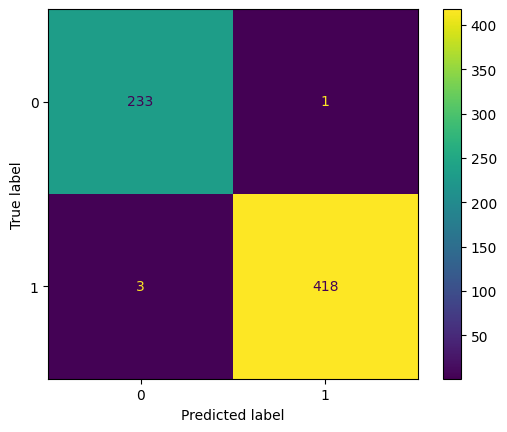

LogisticRegression accuracy score: 0.8396946564885496


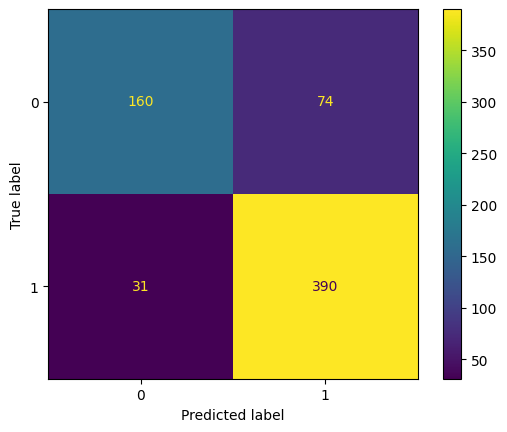

SVC accuracy score: 0.8519083969465648


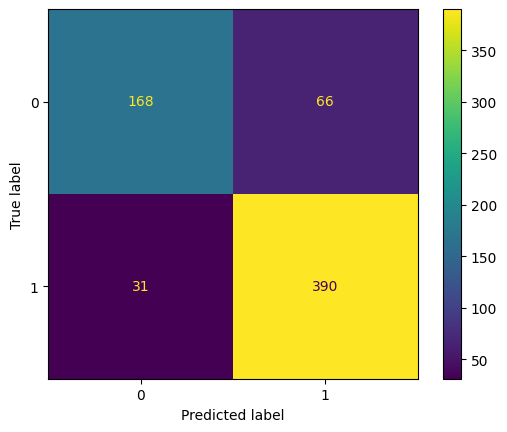

KNeighborsClassifier accuracy score: 0.8473282442748091


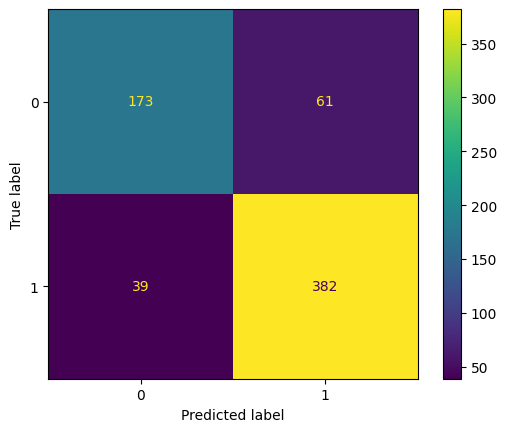

GradientBoostingClassifier accuracy score: 0.9954198473282443


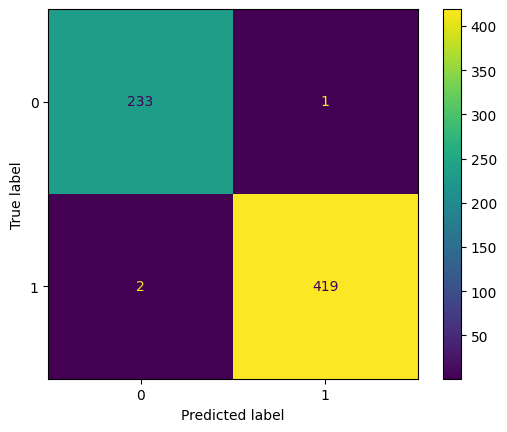

AdaBoostClassifier accuracy score: 0.9862595419847329


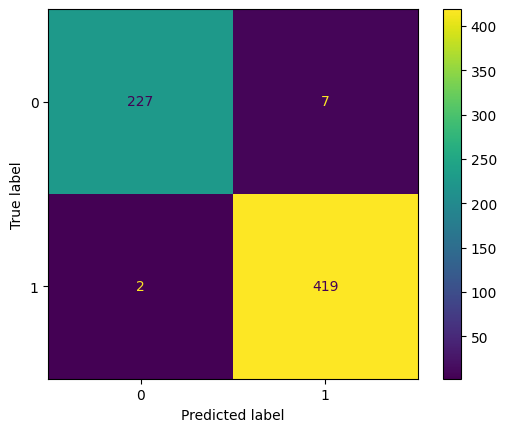

In [ ]:
# Iterar sobre el entrenamiento de los modelos
for model_name in model_names:
    model = getModel(model_name) # Definimos el modelo
    model.fit(data_x_train, data_y_train.values.ravel()) # Flatten y_train to avoid DataConversionWarning
    show_test_results(model, data_x_test, data_y_test)
    accuracy = accuracy_score(data_y_test, model.predict(data_x_test))

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model


## Resultados

El modelo de Gradient Boosting es el que obtiene el mayor puntaje de precisión con 0.9954198473282443, esta medida representa la proporción de predicciones correctas con respecto al total de predicciones realizadas por el modelo.

Tambien podemos verlo representado en la matriz de confusión, esta herramienta grafica nos permite mostrar la comparación entre las predicciones del modelo y las clases reales del conjunto de datos.


### Gradient Boosting Classifier

El Gradient Boosting es una técnica de conjunto (ensemble) que se utiliza para mejorar el rendimiento predictivo de los modelos de machine learning. El Gradient Boosting Classifier es específicamente diseñado para problemas de clasificación.

In [ ]:
# Mostrar los resultados del mejor modelo
if best_model is not None:
    print(f'\nMejor modelo\n {best_model.__class__.__name__} con Accuracy: {best_accuracy}')


Mejor modelo
 GradientBoostingClassifier con Accuracy: 0.9954198473282443


### Gradient Boosting Classifier

El Gradient Boosting es una técnica de conjunto (ensemble) que se utiliza para mejorar el rendimiento predictivo de los modelos de machine learning. El Gradient Boosting Classifier esta diseñado específicamente para problemas de clasificación.